In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np
import shapefile as sp
import datetime as dt

In [22]:
def plot_map(sf, x_lim = None, y_lim = None, figsize = (11,9)):
    plt.figure(figsize = figsize)
    id=0
    for shape in sf.shapeRecords():
        x = [i[0] for i in shape.shape.points[:]]
        y = [i[1] for i in shape.shape.points[:]]
        plt.plot(x, y, 'k')
        
        if (x_lim == None) & (y_lim == None):
            x0 = np.mean(x)
            y0 = np.mean(y)
            plt.text(x0, y0, id, fontsize=10)
        id = id+1
    
    if (x_lim != None) & (y_lim != None):     
        plt.xlim(x_lim)
        plt.ylim(y_lim)

In [23]:
mapa = sp.Reader('mapas/alcaldias.shp')
data = pd.read_csv('carpetas-investigacion.csv')

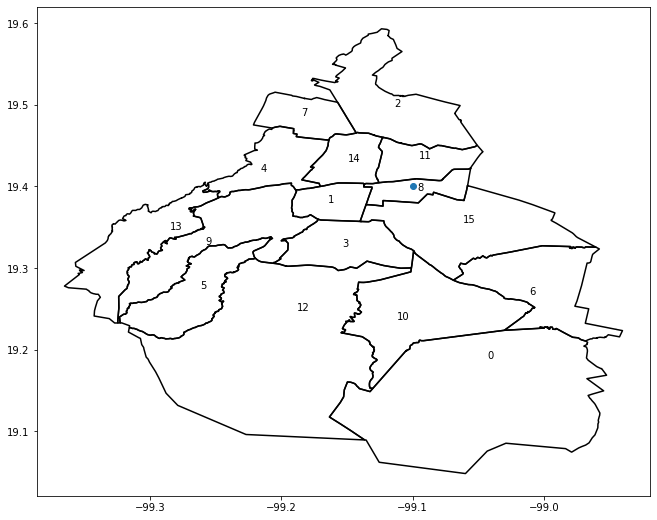

In [24]:
plot_map(mapa)
plt.scatter(-99.1, 19.4)

In [25]:
data

,id,ao_hechos,mes_hechos,fecha_hechos,delito,categoria_delito,fiscalia,agencia,unidad_investigacion,colonia_hechos,alcaldia_hechos,fecha_inicio,mes_inicio,ao_inicio,calle_hechos,calle_hechos2,longitud,latitud,geopoint
0,0,2016.0,Enero,2016-01-05 17:00:00,LESIONES CULPOSAS,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN GUSTAVO A. MADERO,GAM-6,UI-1CD,GRANJAS MODERNAS,GUSTAVO A MADERO,2016-01-05 18:35:37,Enero,2016,SAN JUAN DE ARAGON,CALLE ANZAR,-99.103527,19.481076,"19.4810759998,-99.103527"
1,1,2017.0,Noviembre,2017-11-01 14:00:00,ROBO DE VEHICULO DE SERVICIO PARTICULAR SIN VI...,ROBO DE VEHÍCULO CON Y SIN VIOLENCIA,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-1,UI-1SD,NaN,TLALNEPANTLA DE BAZ,2017-11-01 16:45:20,Noviembre,2017,BENITO JUAREZ,"MUNICIPIO DE TLALNEPANTLA, ESTADO DE MEXICO",NaN,NaN,NaN
2,2,2017.0,Noviembre,2017-11-01 16:40:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN IZTACALCO,IZC-2,UI-1SD,GABRIEL RAMOS MILLÁN SECCIÓN TLACOTAL,IZTACALCO,2017-11-01 16:56:04,Noviembre,2017,SUR 117,ORIENTE 100A,-99.106072,19.395398,"19.3953976727,-99.1060723829"
3,3,2015.0,Diciembre,2015-12-30 20:00:00,FRAUDE,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN IZTAPALAPA,IZP-8,UI-1CD,CONSEJO AGRARISTA MEXICANO,IZTAPALAPA,2016-01-05 21:12:42,Enero,2016,CUARTA CERRADA DE FRESNO,ENCINO (SIN REGISTRO DEL SAP),-99.055887,19.322458,"19.3224579998,-99.055887"
4,4,2018.0,Mayo,2018-05-16 16:00:00,ROBO A REPARTIDOR CON VIOLENCIA,ROBO A REPARTIDOR CON Y SIN VIOLENCIA,INVESTIGACIÓN EN IZTAPALAPA,IZP-9,UI-2SD,DESARROLLO URBANO QUETZALCOATL,IZTAPALAPA,2018-05-22 10:44:45,Mayo,2018,TARASCO,ZAPOTECO,-99.042786,19.319141,"19.3191405147,-99.0427862526"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808866,808866,2018.0,Julio,2018-07-09 22:30:00,ROBO A TRANSEUNTE EN VIA PUBLICA CON VIOLENCIA,ROBO A TRANSEUNTE EN VÍA PÚBLICA CON Y SIN VIO...,INVESTIGACIÓN EN MIGUEL HIDALGO,MH-1,UI-1SD,ANAHUAC,MIGUEL HIDALGO,2018-07-10 18:24:33,Julio,2018,LAGO ALBERTO,LAGO ITZEO,-99.182018,19.439418,"19.439418014,-99.1820184667"
808867,808867,2018.0,Julio,2018-07-29 05:00:00,VIOLENCIA FAMILIAR,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN MILPA ALTA,MIL-2,UI-1CD,SANTA CRUZ XOCHITEPEC,XOCHIMILCO,2018-07-29 12:37:27,Julio,2018,CALLEJON MORELOS,NaN,-99.134738,19.254935,"19.2549354998,-99.1347381"
808868,808868,2019.0,Febrero,2019-02-14 19:00:00,LESIONES INTENCIONALES POR ARMA DE FUEGO,LESIONES DOLOSAS POR DISPARO DE ARMA DE FUEGO,INVESTIGACIÓN EN MIGUEL HIDALGO,H1,UI-1SD,INDUSTRIAL,GUSTAVO A MADERO,2019-02-15 12:50:00,Febrero,2019,CALZ. DE LOS MISTERIOS,NaN,-99.122943,19.473867,"19.473866796,-99.1229431996"
808869,808869,2019.0,Febrero,2019-02-15 10:00:00,PRIVACION DE LA LIBERTAD PERSONAL,DELITO DE BAJO IMPACTO,INVESTIGACIÓN EN AZCAPOTZALCO,AZ-4,UI-1SD,COSMOPOLITA,AZCAPOTZALCO,2019-02-15 13:04:00,Febrero,2019,CERDEÑA,NaN,-99.163384,19.473593,"19.4735930736,-99.163384042"


In [26]:
feminicidios = data[data.delito.str.contains("FEMINICIDIO")]

In [35]:
cord_fem = feminicidios[["fecha_hechos", "longitud", "latitud"]]
cord_fem["fecha_hechos"] = pd.to_datetime(cord_fem["fecha_hechos"], format="%Y-%m-%d %H:%M:%S")

/tmp/ipykernel_4871/3308335711.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cord_fem["fecha_hechos"] = pd.to_datetime(cord_fem["fecha_hechos"], format="%Y-%m-%d %H:%M:%S")


In [37]:
hora = cord_fem.fecha_hechos.dt.hour.index

In [ ]:
filtro_hr = cord_fem.fecha_hechos.dt.hour.index

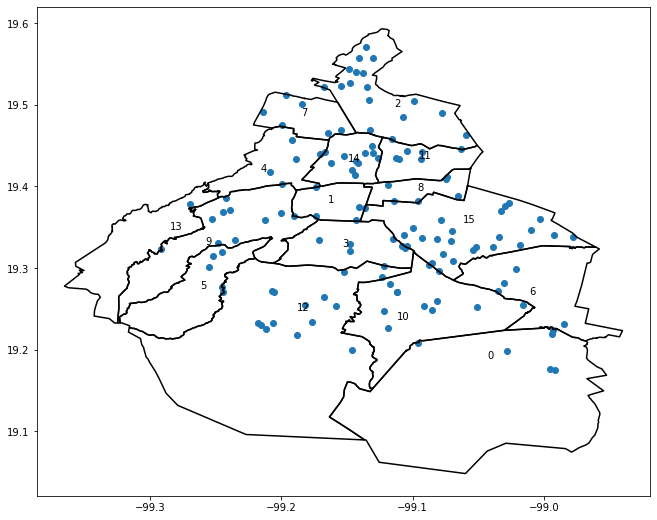

In [30]:
plot_map(mapa)
plt.scatter(cord_fem["longitud"], cord_fem["latitud"])

/home/carlos/.local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='longitud', ylabel='latitud'>

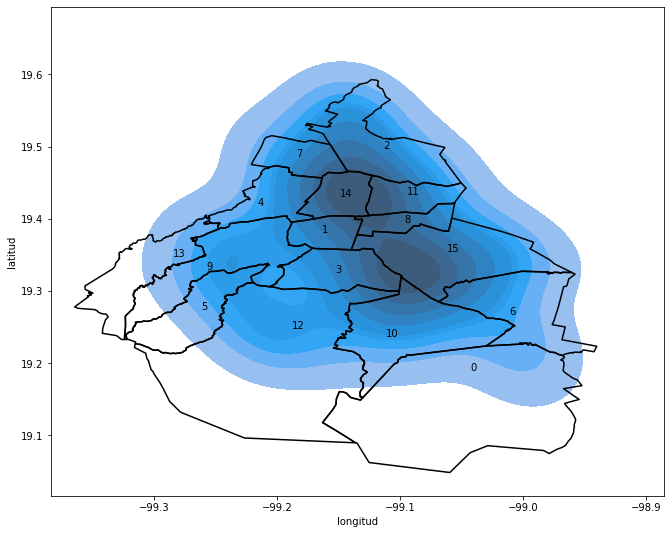

In [32]:
plot_map(mapa)
sbn.kdeplot(cord_fem["longitud"], cord_fem["latitud"], fill=True)

In [ ]:
plot_map(mapa)
sbn.kdeplot(cord_fem["longitud"], cord_fem["latitud"], fill=True)